In [81]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc
from matplotlib.patches import Arc
rc('animation', html='jshtml')
plt.style.use(['grayscale', 'seaborn-v0_8-white'])

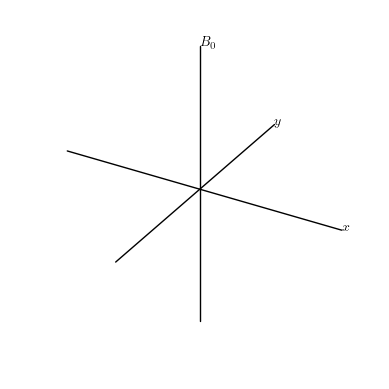

In [82]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')



ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.set_aspect('equal')



# Remove background and grid
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(False)


plt.rcParams.update({
    # "pgf.texsystem": "pdflatex",
    "text.usetex": True,
    "font.family": "serif",
    # "pgf.rcfonts": False,
})
plt.savefig("plot.pgf")


L = 1.5
origin = np.array([0,0, 0])
# X axis
# X-axis
ax.plot3D([-L, L], [0, 0], [0, 0], color='black', linewidth=1)
# Y-axis
ax.plot3D([0, 0], [-L, L], [0, 0], color='black', linewidth=1)
# Z-axis
ax.plot3D([0, 0], [0, 0], [-L, L], color='black', linewidth=1)


# Axis labels at positive ends
ax.text(L, 0, 0, '$x$', color='black')
ax.text(0, L, 0, '$y$', color='black')
ax.text(0, 0, L, '$B_0$', color='black')


# ax.xaxis.pane.set_edgecolor('w')
# ax.yaxis.pane.set_edgecolor('w')
# ax.zaxis.pane.set_edgecolor('w')

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False


ax.set_axis_off()

In [83]:
# start off with a vector at 10 degrees 

starting_angle = (90-20)*np.pi/180

vector = np.array([np.cos(starting_angle),0, np.sin(starting_angle)])

quiver = ax.quiver(*origin, *vector, color = 'r')

list_pts = [[],[],[]]

points,  = ax.plot(list_pts[0], list_pts[1], list_pts[2], color = 'r')
# time_text = ax.text2D(0.05, 0.95, '', transform=ax.transAxes, fontsize=12, verticalalignment='top')

b_field = np.array([0,0,1])

# define a timestep 


b_0 = ax.quiver(*origin, *(1.5*b_field), color='b', arrow_length_ratio=0.1)


dt = 0.001
num_steps = 80000 # the higher the number, the longer it runs
num_frames= 100 # higher the number, the closer the points

ref_time = 0

# instead of plotting every point plot every 10 points:

def update(frame):
    global quiver
    global vector 
    global points
    global time_text
    global ref_time
    
    # global points
    quiver.remove()

    # Now we need to add the continuous field but the frequency needs to be at the frequency of precession
    
    # How do we determine the frequency of precession in this case 
    
    
    # We set the larmor frequency to be 1, so the period will be 2π as expected, since f = 2π/T 
    
    # Now add the precession in the x axis 
    
    for i in range(int(num_steps/num_frames)):
        
        circular_field = 0.1*np.array([np.cos(ref_time), 0, 0])
        if(ref_time>67):
            circular_field = 0
        to_add = np.cross(vector, b_field+circular_field)*dt 
        
        vector = vector+to_add
        
        vector = vector/np.linalg.norm(vector)
        
        
        list_pts[0].append(vector[0])
        list_pts[1].append(vector[1])
        list_pts[2].append(vector[2])
        
        ref_time+=dt
        # time_text.set_text(f'Time: {np.round(ref_time,2)} s')
    
    
    points.set_data(list_pts[0], list_pts[1])
    points.set_3d_properties(list_pts[2])
        
    quiver = ax.quiver(*origin, *vector, color='r')
    return [quiver, points, time_text]


# interval defines delay between frames in milliseconds, not really relavant since we're just doing a numerical approximation for now

ani = FuncAnimation(fig, update, frames = np.linspace(0,1, num_frames), interval = 20, blit = True)

ani

In [84]:
# writer = animation.PillowWriter(fps=200)
# ani.save('larmor_precession.mp4', writer=writer)


FFwriter = animation.FFMpegFileWriter(fps=20, )
ani.save('pi_pulse.mp4', writer=FFwriter, dpi=300)